## Problem with Standard Thresholding

The problem with standard thresholding is that we need to define the threshold value manually. However, when shadows and lighting conditions vary, the threshold must be adjusted each time, which can be inconvenient. But what if we could compute the threshold in a way that works under all conditions? That's where the concept of adaptive thresholding comes in.

Text(0.5, 1.0, 'Global Thresholding')

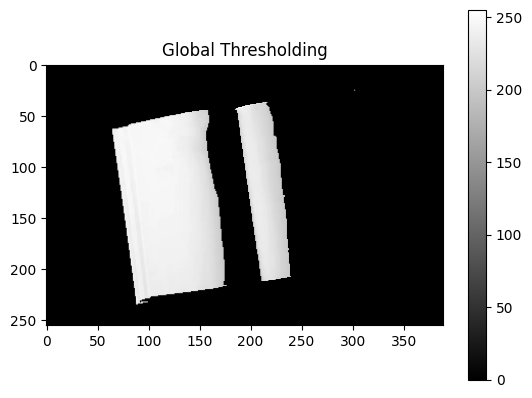

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img=cv.imread("Page.png",0)
img[img<=200]=0
plt.imshow(img,cmap="gray")
plt.colorbar()
plt.title("Global Thresholding")

## Adaptive Mean Thresholding

**How It Works:**

The threshold value for each pixel is calculated as the mean of the pixel values in the neighborhood (block size) around that pixel.

**Parameters:**

blockSize: The size of the region around the pixel (e.g., 11x11).
C: A constant subtracted from the mean to adjust the threshold.

Adaptive Mean Thresholding Result:


Text(0.5, 1.0, 'Adaptive Mean Thresholding')

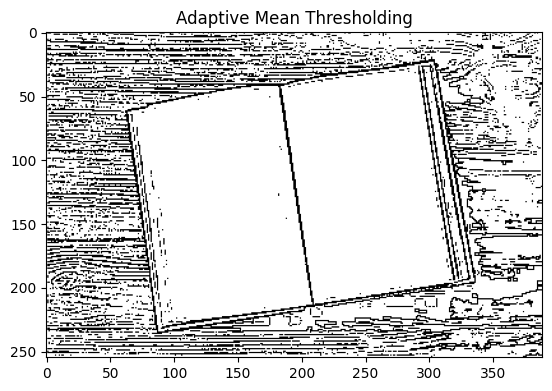

In [17]:
import numpy as np

# Example grayscale image
image = cv.imread("Page.png",0)

# Padding the image to handle the borders
padded_image = np.pad(image, 1, mode='constant', constant_values=0)

# Initialize an output image
mean_thresholded = np.zeros_like(image)

# Parameters
C = 2
kernel_size = 3

# Perform Adaptive Mean Thresholding
for i in range(1, padded_image.shape[0] - 1):
    for j in range(1, padded_image.shape[1] - 1):
        # Extract the 3x3 neighborhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Calculate the mean of the neighborhood
        local_mean = np.mean(neighborhood)

        # Calculate the thresholded value
        if image[i-1, j-1] > (local_mean - C):
            mean_thresholded[i-1, j-1] = 255  # Set pixel to white
        else:
            mean_thresholded[i-1, j-1] = 0  # Set pixel to black

print("Adaptive Mean Thresholding Result:")
plt.imshow(mean_thresholded,cmap="gray")
plt.title("Adaptive Mean Thresholding")


## Adaptive Gaussian Thresholding

**How it works**

Similar to adaptive mean thresholding, but instead of a simple mean, the threshold value is calculated as a weighted sum of the pixel values in the neighborhood, where the weights are determined by a Gaussian window.

**Parameters:**

blockSize: The size of the neighborhood.
C: A constant subtracted from the Gaussian-weighted mean.

Adaptive Gaussian Thresholding Result:


Text(0.5, 1.0, 'Adaptive Gaussian Thresholding')

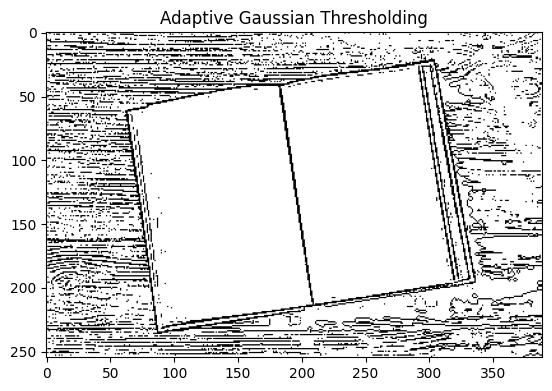

In [15]:
import numpy as np

# Example grayscale image
image = cv.imread("Page.png",0)

# Padding the image to handle the borders
padded_image = np.pad(image, 1, mode='constant', constant_values=0)

# Initialize an output image
gaussian_thresholded = np.zeros_like(image)

# Gaussian kernel (3x3) with sigma = 1
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

# Normalize the Gaussian kernel
gaussian_kernel /= np.sum(gaussian_kernel)

# Parameters
C = 2
kernel_size = 3

# Perform Adaptive Gaussian Thresholding
for i in range(1, padded_image.shape[0] - 1):
    for j in range(1, padded_image.shape[1] - 1):
        # Extract the 3x3 neighborhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Calculate the Gaussian-weighted mean of the neighborhood
        weighted_sum = np.sum(neighborhood * gaussian_kernel)

        # Calculate the thresholded value
        if image[i-1, j-1] > (weighted_sum - C):
            gaussian_thresholded[i-1, j-1] = 255  # Set pixel to white
        else:
            gaussian_thresholded[i-1, j-1] = 0  # Set pixel to black

print("Adaptive Gaussian Thresholding Result:")
plt.imshow(gaussian_thresholded,cmap="gray")
plt.title("Adaptive Gaussian Thresholding")
